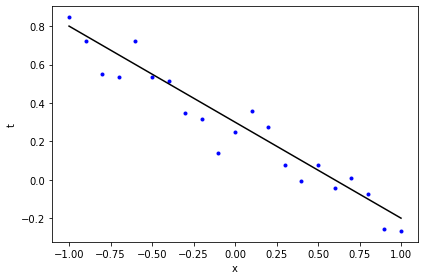

In [3]:
# Generate synthetic data
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123456)
Npts = 21
sigma = 0.1
x = np.atleast_2d(np.linspace(-1,1,Npts)).T
Phi = np.concatenate((np.ones((Npts,1)),x),axis=1)
wtrue = np.array([0.3,-0.5])
h = np.matmul(Phi,wtrue)
t = h + sigma*np.random.randn(Npts)
plt.figure()
plt.plot(x,t,'b.',x,h,'k-')
plt.xlabel('x')
plt.ylabel('t')
plt.axis('auto')
plt.tight_layout()
plt.savefig('bayesdata.png')

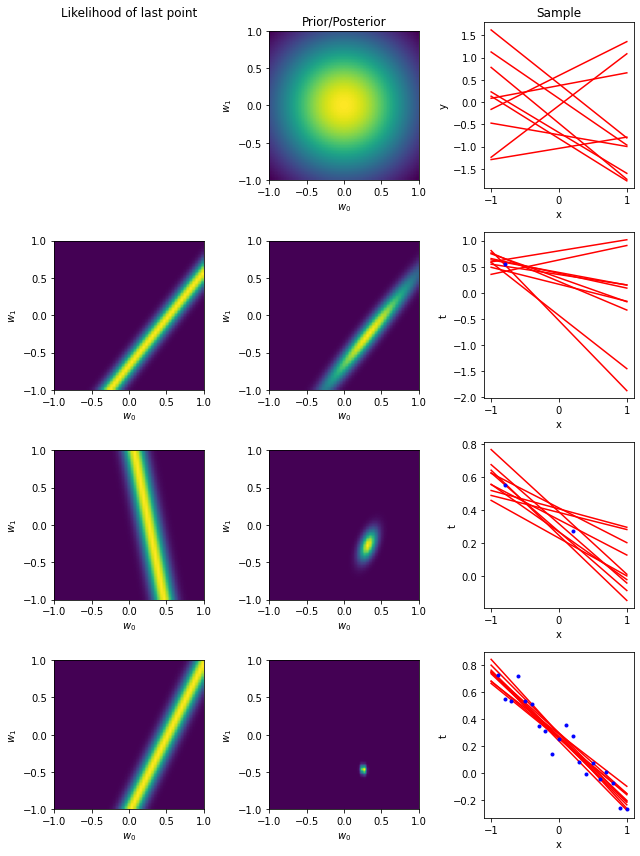

In [4]:
from scipy.stats import multivariate_normal
# Define the parameters
alpha = 2.0
beta = (1/sigma)**2
m0 = np.zeros(wtrue.size)
S0 = (1/alpha)*np.eye(wtrue.size)
plt.figure(figsize=[9,12])
# Preplot the likelihood
plt.subplot(4,3,1)
plt.title('Likelihood of last point')
plt.axis('off')
# plot the prior
plt.subplot(4,3,2)
plt.title('Prior/Posterior')
plt.tight_layout()
mvn = multivariate_normal(mean=m0,cov=S0)
ngrid = 51
domain = np.linspace(-0.995,0.995,ngrid)
dx = domain
dy = domain
grid = [[i,j] for i in dx for j in dy]
pdf = np.reshape(mvn.pdf(grid),(ngrid,ngrid)).T
plt.imshow(pdf,extent=[-1,1,-1,1])
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')
plt.tight_layout()
# sample the parameters
plt.subplot(4,3,3)
plt.title('Sample')
sample = mvn.rvs(10)
for s in sample:
    plt.plot(x,np.matmul(Phi,s),'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

# Randomise the data points
sample_indices = np.random.choice(np.linspace(0,Npts-1,Npts).astype(int),size=Npts,replace=False)

for i,N in enumerate([1,2,20]):
    # Sample the first N points and compute posterior parameters
    xsample = np.atleast_2d(x[sample_indices[0:N]])
    tsample = np.atleast_2d(t[sample_indices[0:N]]).T
    Phisample = np.atleast_2d(Phi[sample_indices[0:N]])
    invS0 = alpha*np.eye(wtrue.size)
    invSN = invS0 + beta*np.matmul(Phisample.T,Phisample)
    SN = np.linalg.inv(invSN)
    mN = np.squeeze(beta*np.matmul(SN,np.matmul(Phisample.T,tsample)))
    
    # Plot the likelihood of only the last added points
    residual = (np.atleast_2d(tsample[-1])-np.matmul(np.atleast_2d(Phisample[-1]),np.array(grid).T))
    likelihood = np.exp(-np.diag(np.matmul(residual.T,residual))/(2*sigma*sigma))
    likelihood = np.rot90(np.reshape(likelihood,(ngrid,ngrid)))
    plt.subplot(4,3,3*i+4)
    plt.imshow(likelihood,extent=[-1,1,-1,1])
    plt.xlabel(r'$w_0$')
    plt.ylabel(r'$w_1$')
    plt.tight_layout()
    
    # plot the posterior
    posterior = multivariate_normal(mean=mN,cov=SN)
    plt.subplot(4,3,3*i+5)
    pdf = np.rot90(np.reshape(posterior.pdf(grid),(ngrid,ngrid)))
    plt.imshow(pdf,extent=[-1,1,-1,1])
    plt.xlabel(r'$w_0$')
    plt.ylabel(r'$w_1$')
    plt.tight_layout()
    # sample the parameters
    plt.subplot(4,3,3*i+6)
    sample = posterior.rvs(10)
    for s in sample:
        plt.plot(x,np.matmul(Phi,s),'r-')
    plt.plot(xsample,tsample,'b.')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.tight_layout()

plt.savefig('bayesregression.png')